Aufgabe:
- python colab
- graph visualisieren (matplot)
- per tastenkommando weiter gehen
- Schrittweite immer erhöhen/verringern iterieren
- abbruchkriterium: 1% genauigkeit

Algo:
y=m*x



[Excel Image](../Excel_Vorlage.jpg)

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import pandas as pd
import statistics

In [3]:
# Methods
def calc(m,x):
    y = []
    for num in x:
        y.append(m * num)
    return y

def calc_error(my_ylist,ki_ylist):
    subtracted = np.subtract(ki_ylist, my_ylist)
    subtracted = subtracted * subtracted
    sum_qerror = sum(subtracted)
    return sum_qerror

# Plot
def plot(xlist,my_ylist,ki_ylist,m,err,sw):
    plt.clf()
    plt.plot(xlist,my_ylist,"-o",label="my",color="g")
    plt.plot(xlist,ki_ylist,"-o",label="ki",color="m")
    #plt.text(2,2,err,bbox=dict(facecolor='red', alpha=0.5,boxstyle="round"))
    plt.title(f"y = {m} * x, Error = {err}, Schrittweite = {sw}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


# Create List for x values
xlist = [l+1 for l in range(9)]
my_ylist = [2,4,6,7,11,12,15,17,20]
ki_ylist = calc(2,xlist)
fehler= calc_error(my_ylist,ki_ylist)
#m = 2

print(f"x: {xlist}")
print(f"my y: {my_ylist}")
print(f"ki y: {ki_ylist}")
print(f"fehler: {fehler}")



x: [1, 2, 3, 4, 5, 6, 7, 8, 9]
my y: [2, 4, 6, 7, 11, 12, 15, 17, 20]
ki y: [2, 4, 6, 8, 10, 12, 14, 16, 18]
fehler: 8


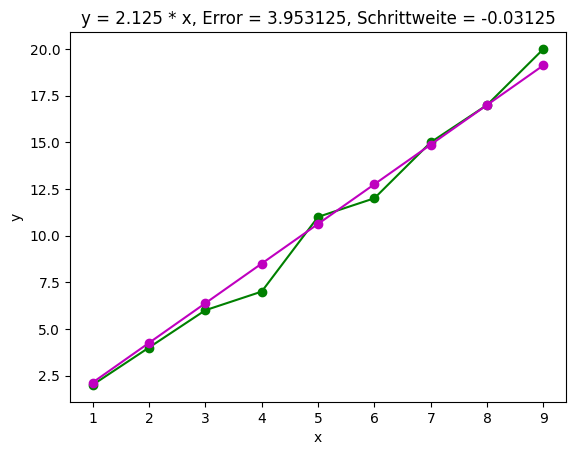

          Error  Schrittweite     Abweichung
0   1012.000000       1.00000  100000.000000
1   2369.000000      -0.50000    1357.000000
2   1619.250000      -0.50000     749.750000
3   1012.000000      -0.50000     607.250000
4    547.250000      -0.50000     464.750000
5    225.000000      -0.50000     322.250000
6     45.250000      -0.50000     179.750000
7      8.000000      -0.50000      37.250000
8    113.250000       0.25000     105.250000
9     42.812500       0.25000      70.437500
10     8.000000       0.25000      34.812500
11     8.812500      -0.12500       0.812500
12     3.953125      -0.12500       4.859375
13     8.000000       0.06250       4.046875
14     4.863281       0.06250       3.136719
15     3.953125       0.06250       0.910156
16     5.269531      -0.03125       1.316406
17     4.333008      -0.03125       0.936523
18     3.953125      -0.03125       0.379883


In [4]:
m = 4.0
sw = 1.0
deviation = 100000
err_lst = []
sw_lst = []
deviation_lst = []
while True:
    clear_output(wait=True)
    ki_ylist = calc(m,xlist)
    err = float(calc_error(my_ylist,ki_ylist))
    plot(xlist = xlist,my_ylist = my_ylist, ki_ylist = ki_ylist,m = m,err = err,sw = sw)
    if err_lst and err!= 0.0:
        if float(err_lst[-1]) - err < 0 : 
            sw = sw * -1
            sw = sw / 2
        deviation = abs(err - err_lst[-1])
    err_lst.append(err)
    sw_lst.append(sw)
    deviation_lst.append(deviation)
    df = pd.DataFrame(data=list(zip(err_lst,sw_lst,deviation_lst)),columns=["Error","Schrittweite","Abweichung"]) 
    print(df)
    m = m + sw
    inp = input("Continue? any/n")
    if deviation < 0.01 or inp == "n":
        break


In [5]:
print(df.tail(20))

          Error  Schrittweite     Abweichung
0   1012.000000       1.00000  100000.000000
1   2369.000000      -0.50000    1357.000000
2   1619.250000      -0.50000     749.750000
3   1012.000000      -0.50000     607.250000
4    547.250000      -0.50000     464.750000
5    225.000000      -0.50000     322.250000
6     45.250000      -0.50000     179.750000
7      8.000000      -0.50000      37.250000
8    113.250000       0.25000     105.250000
9     42.812500       0.25000      70.437500
10     8.000000       0.25000      34.812500
11     8.812500      -0.12500       0.812500
12     3.953125      -0.12500       4.859375
13     8.000000       0.06250       4.046875
14     4.863281       0.06250       3.136719
15     3.953125       0.06250       0.910156
16     5.269531      -0.03125       1.316406
17     4.333008      -0.03125       0.936523
18     3.953125      -0.03125       0.379883
